# ANALYSIS FOR YEAR 2022

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
import plotly.express as px

In [2]:
df_2022 = pd.read_csv('../Datasets/Datasets1.csv',)


In [3]:
df_2022.head()

,Country,ISO Code,Region,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation
0,Afghanistan,AFG,Asia Pacific,156,122,38.27,44.65,43.88,42.54,43.33,16.96,0,0,0,0,Very Serious
1,Albania,ALB,Europe,103,83,56.41,50.55,29.39,68.77,66.60,66.75,0,0,0,0,Problematic
2,Algeria,DZA,Arab States,134,146,45.53,41.21,32.40,54.17,55.88,44.02,0,0,0,0,Difficult
3,Andorra,AND,Europe,53,39,68.79,68.12,50.41,69.12,68.80,87.48,0,0,0,0,Problematic
4,Angola,AGO,Africa,99,103,57.17,52.83,35.03,61.11,73.00,63.87,0,0,0,0,Problematic


In [4]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   180 non-null    object 
 1   ISO Code                  179 non-null    object 
 2   Region                    179 non-null    object 
 3   Position 2022             180 non-null    int64  
 4   Position 2021             180 non-null    int64  
 5   Global Score              180 non-null    float64
 6   Politic Score             180 non-null    float64
 7   Economic Score            180 non-null    float64
 8   Legislative Score         180 non-null    float64
 9   Social Score              180 non-null    float64
 10  Security Score            180 non-null    float64
 11  Journalist Killed         180 non-null    int64  
 12  Media Workers Killed      180 non-null    int64  
 13  Journalist Imprisoned     180 non-null    int64  
 14  Media Work

In [5]:
df_2022.describe()

,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.500000,90.500000,58.236944,57.006222,45.000611,62.453667,66.353722,60.369556,0.177778,0.011111,0.855556,0.016667
std,52.105662,52.105662,17.218163,17.196836,16.660411,18.155229,18.035181,24.349103,0.916366,0.105114,2.655493,0.128376
min,1.000000,1.000000,13.920000,22.220000,0.000000,15.790000,12.000000,4.630000,0.000000,0.000000,0.000000,0.000000
25%,45.750000,45.750000,45.360000,43.790000,32.762500,51.667500,54.875000,41.060000,0.000000,0.000000,0.000000,0.000000
50%,90.500000,90.500000,59.145000,55.670000,42.110000,65.935000,68.900000,66.665000,0.000000,0.000000,0.000000,0.000000
75%,135.250000,135.250000,71.120000,70.082500,54.050000,77.460000,81.232500,80.152500,0.000000,0.000000,0.000000,0.000000
max,180.000000,180.000000,92.650000,94.890000,90.380000,92.230000,95.000000,96.460000,9.000000,1.000000,22.000000,1.000000


In [6]:
df_2022['Position 2022 Change'] = df_2022['Position 2021'] - df_2022['Position 2022']

In [7]:
df_2022

,Country,ISO Code,Region,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2022 Change
0,Afghanistan,AFG,Asia Pacific,156,122,38.27,44.65,43.88,42.54,43.33,16.96,0,0,0,0,Very Serious,-34
1,Albania,ALB,Europe,103,83,56.41,50.55,29.39,68.77,66.60,66.75,0,0,0,0,Problematic,-20
2,Algeria,DZA,Arab States,134,146,45.53,41.21,32.40,54.17,55.88,44.02,0,0,0,0,Difficult,12
3,Andorra,AND,Europe,53,39,68.79,68.12,50.41,69.12,68.80,87.48,0,0,0,0,Problematic,-14
4,Angola,AGO,Africa,99,103,57.17,52.83,35.03,61.11,73.00,63.87,0,0,0,0,Problematic,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,South America,159,148,37.78,33.70,31.73,44.74,47.50,31.22,0,0,0,0,Very Serious,-11
176,Vietnam,VNM,Asia Pacific,174,175,26.11,32.32,18.71,27.49,34.67,17.37,0,0,1,0,Very Serious,1
177,Yemen,YEM,Middle East,169,169,29.14,33.03,27.55,38.60,35.00,11.54,3,0,4,0,Very Serious,0
178,Zambia,ZMB,Africa,109,115,55.40,52.35,37.76,58.33,64.00,64.55,0,0,0,0,Problematic,6


## Cleaning

The dataset is mostly clean and complete, with only 2 issues that need to be addressed. The Region column and one row with missing data.

### Region

In [8]:
df_2022.Region.value_counts()

Europe              47
Africa              43
Asia Pacific        38
South America       24
Middle  East        15
Arab States          9
North America        2
South al America     1
Name: Region, dtype: int64

In [9]:
df_2022[df_2022.Country == 'Mexico']

,Country,ISO Code,Region,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2022 Change
104,Mexico,MEX,South America,127,143,47.57,58.18,43.37,65.79,59.5,11.02,9,0,0,0,Difficult,16


In [10]:
tables = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php')
tables[2].set_index('ISO-alpha3 Code', inplace=True)
regions = tables[2][['Region 1', 'Continent']]
df_2022 = pd.merge(df_2022, regions, how='left', left_on='ISO Code', right_index=True)
df_2022.drop('Region', axis=1, inplace=True)
df_2022.rename(columns={'Region 1':'Region'}, inplace=True)

In [11]:
#Manually updating the 3 countries the United Nations Statistics Division table did not cover
df_2022.loc['Kosovo', 'Region'] = 'Southern Europe'
df_2022.loc['Kosovo', 'Continent'] = 'Europe'
df_2022.loc['Taiwan', 'Region'] = 'Eastern Asia'
df_2022.loc['Taiwan', 'Continent'] = 'Asia'
df_2022.loc['OECS', 'Region'] = 'Caribbean'
df_2022.loc['OECS', 'Continent'] = 'North America'

In [12]:
fig = px.choropleth(df_2022, locations='ISO Code', color='Region',  hover_name = df_2022.index, hover_data=["Position 2022"], title = 'Regions')
fig.show()

#### Missing Data

In [13]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to OECS
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   180 non-null    object 
 1   ISO Code                  179 non-null    object 
 2   Position 2022             180 non-null    float64
 3   Position 2021             180 non-null    float64
 4   Global Score              180 non-null    float64
 5   Politic Score             180 non-null    float64
 6   Economic Score            180 non-null    float64
 7   Legislative Score         180 non-null    float64
 8   Social Score              180 non-null    float64
 9   Security Score            180 non-null    float64
 10  Journalist Killed         180 non-null    float64
 11  Media Workers Killed      180 non-null    float64
 12  Journalist Imprisoned     180 non-null    float64
 13  Media Workers Imprisoned  180 non-null    float64
 14  Situation     

In [14]:
df_2022[df_2022['ISO Code'].isna()]

,Country,ISO Code,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2022 Change,Region,Continent
122,OECS,NaN,55.0,45.0,68.49,62.91,48.37,68.25,79.8,83.13,0.0,0.0,0.0,0.0,Problematic,-10.0,Northern Europe,Europe
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Europe,Europe
Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Asia,Asia
OECS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean,North America


The Dataset groups several Carribean nations under the Organisation of Eastern Caribbean States, which does not have an ISO Code. This means nations within the OECS won't show up on our chloropeth map visualizations, but shouldn't effect anything else.

## Exploratory Data Analysis and Visualization

In [15]:
#set color for seaborn visualizations
sns.set(rc={"axes.facecolor":"#d1f0ec", "grid.color":"#b7c7c9"})

In [16]:
fig = px.choropleth(df_2022, locations='ISO Code', color='Global Score',  hover_name = df_2022.index, hover_data=["Position 2022", "Region", "Continent"], title='Global Score Map')
fig.show()

Visualizing the Global Scores on a map makes the information a little bit more digestible than reading through it in table form, and resulted in a few interesting observations.

The top 5 scored countries are all in Northern Europe
European, Oceanic and North American countries tend to score higher
Asian and African countries tends to score lower
However there are exceptions. I was surprised to see that Costa Rica and Namibia ranked ahead of western countries like Canada or the United Kingdom

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19064\1068167612.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19064\1068167612.py:2: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



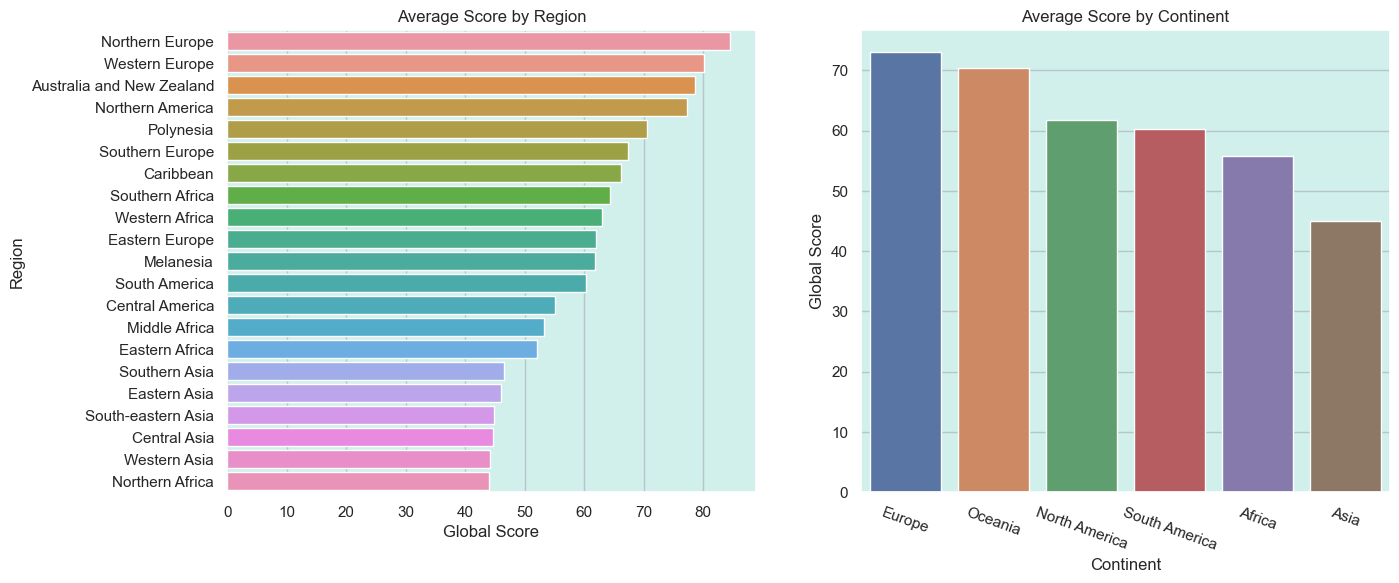

In [17]:
piv_con = pd.pivot_table(df_2022,index='Continent')
piv_reg = pd.pivot_table(df_2022,index='Region')


fig, ax = plt.subplots(ncols=2,figsize=(15,6))
sns.barplot(ax=ax[1],data=piv_con, x = piv_con.index, y= 'Global Score',order=piv_con.sort_values('Global Score', ascending=False).index)
sns.barplot(ax=ax[0],data=piv_reg, x = 'Global Score', y= piv_reg.index,order=piv_reg.sort_values('Global Score', ascending=False).index)
ax[0].set_title('Average Score by Region')
ax[1].set_title('Average Score by Continent')
plt.xticks(rotation=-20)
plt.show()

These barplots reinforce that Press Freedom is greatest in Europe.

Europe has the highest average score by continent
Northern Europe is the only region that reaches the threshold to be considered 'Good' by Reporters without Borders (>=85 points)
Conversely, Asia has the lowest average score by a significant margin

5 of the 6 lowest scored regions are located in Asia
Eastern Asia scored highest amongst Asian regions with 50 points. Reporters without borders considers this a 'Difficult' score

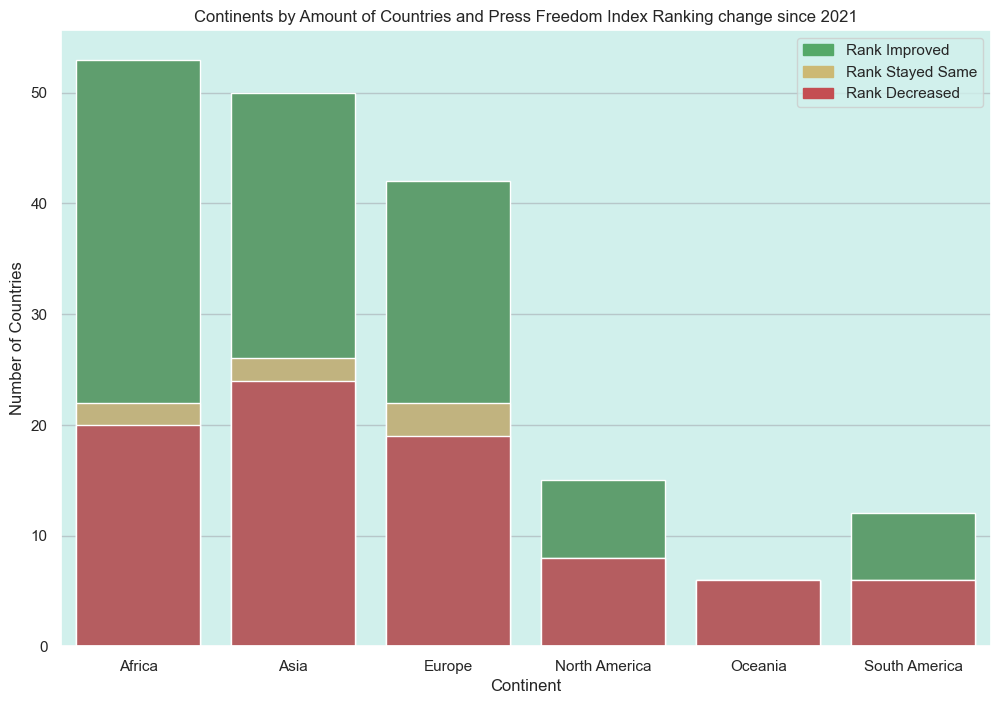

In [18]:
c = sns.color_palette() 
fig, ax = plt.subplots(figsize=(12,8))


total = df_2022.groupby('Continent')['Global Score'].count().reset_index()
bar1 = sns.barplot(x = 'Continent', y = 'Global Score', data=total, color=c[2])
same = df_2022[df_2022['Position 2022 Change'] <= 0].groupby('Continent')['Global Score'].count().reset_index()
bar1 = sns.barplot(x = 'Continent', y = 'Global Score', data=same, color=c[8])
decrease = df_2022[df_2022['Position 2022 Change'] < 0].groupby('Continent')['Global Score'].count().reset_index()
bar1 = sns.barplot(x = 'Continent', y = 'Global Score', data=decrease, color=c[3])

#Set up legend
top_bar = mpatches.Patch(color=c[2], label='Rank Improved')
middle_bar = mpatches.Patch(color=c[8], label='Rank Stayed Same')
bottom_bar = mpatches.Patch(color=c[3], label='Rank Decreased')
plt.legend(handles=[top_bar, middle_bar, bottom_bar])
plt.ylabel('Number of Countries')
plt.title('Continents by Amount of Countries and Press Freedom Index Ranking change since 2021')

plt.show()

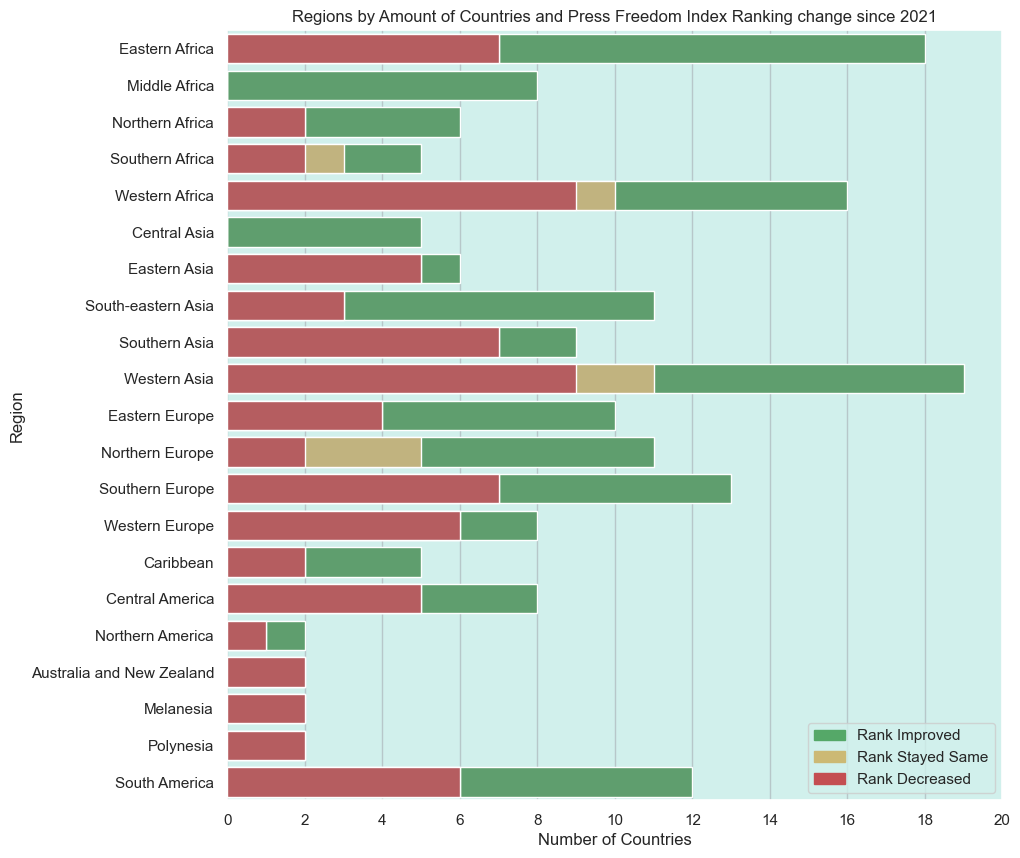

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

total = df_2022.groupby(['Continent', 'Region'])['Global Score'].count()
same =df_2022[df_2022['Position 2022 Change'] <= 0].groupby(['Continent', 'Region'])['Global Score'].count().align(total, join='right', axis=0, fill_value=0)[0].reset_index()
decrease = df_2022[df_2022['Position 2022 Change'] <0].groupby(['Continent', 'Region'])['Global Score'].count().align(total, join='right', axis=0, fill_value=0)[0].reset_index()
total = total.reset_index()


bar1 = sns.barplot(y = 'Region', x = 'Global Score', data=total, color=c[2], ax=ax)
bar1 = sns.barplot(y = 'Region', x = 'Global Score', data=same, color=c[8], ax=ax)
bar1 = sns.barplot(y = 'Region', x = 'Global Score', data=decrease, color=c[3], ax=ax)

#Set up legend
top_bar = mpatches.Patch(color=c[2], label='Rank Improved')
middle_bar = mpatches.Patch(color=c[8], label='Rank Stayed Same')
bottom_bar = mpatches.Patch(color=c[3], label='Rank Decreased')
plt.legend(handles=[top_bar, middle_bar, bottom_bar])

x_nums = np.linspace(0,20,num=11)
plt.xticks(x_nums)
plt.xlabel('Number of Countries')
plt.title('Regions by Amount of Countries and Press Freedom Index Ranking change since 2021')

plt.show()

The rank of all countries in Oceania decreased from 2021   
The rank of all countires in Middle Africa and East Asia increased since 2021  
Africa was the contient that saw improvement across the most countries

In [20]:
df_2022[df_2022['Position 2022 Change'] == min(df_2022['Position 2022 Change'])]

,Country,ISO Code,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2022 Change,Region,Continent
68,Hong Kong,HKG,148.0,80.0,41.64,40.5,35.9,42.58,57.45,31.78,0.0,0.0,0.0,1.0,Difficult,-68.0,Eastern Asia,Asia


Hong Kong saw the greatest fall in ranking, going from 80th in 2021 to 148th in 2022.

In [21]:
df_2022[df_2022['Position 2022 Change'] == max(df_2022['Position 2022 Change'])]

,Country,ISO Code,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2022 Change,Region,Continent
161,Timor-Leste,TLS,17.0,71.0,81.89,85.45,68.71,85.96,75.67,93.65,0.0,0.0,5.0,0.0,Satisfactory,54.0,South-eastern Asia,Asia


Timor-Leste had the greatest improvement in ranking, going from 71st in 2021 to 17th in 2022.

In [22]:
df_2022['Situation'].value_counts()

Problematic     62
Difficult       42
Satisfactory    40
Very Serious    28
Good             8
Name: Situation, dtype: int64

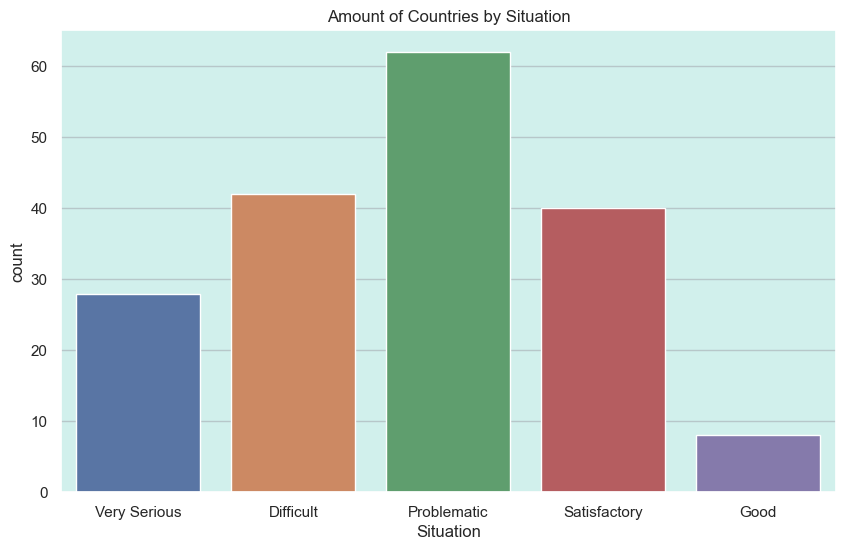

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Situation', data=df_2022, ax=ax, orient="h",order=['Very Serious', 'Difficult', 'Problematic', 'Satisfactory', 'Good'])
ax.set_title('Amount of Countries by Situation')
plt.show()

Text(0.5, 1.0, 'Amount of Countries by Global Score')

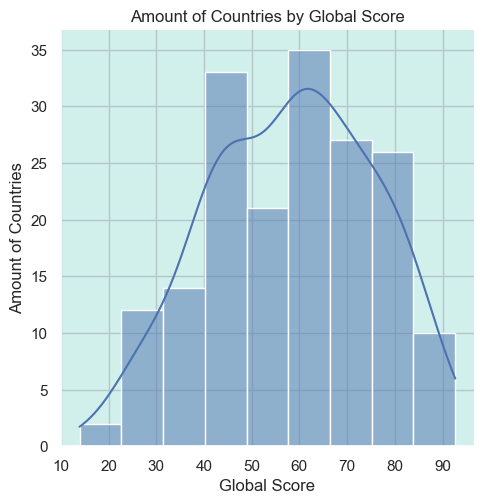

In [24]:
sns.displot(x='Global Score', data=df_2022, kde=True)
plt.ylabel('Amount of Countries')
plt.title('Amount of Countries by Global Score')

The majority of countries have a Press Freedom Index of Problematic or worse   
Very few countries have a Press Freedom Index of 'Good'

In [25]:
fig = px.choropleth(df_2022, locations='ISO Code', color='Situation',  hover_name = df_2022.index, hover_data=["Position 2022", "Region", "Continent", "Global Score"], title='Situation Map')
fig.show()

Visualizing Situation on a map really drives home just how few countries are considered to have 'Good' Press Freedom compared to those considers "Problematic" or "Very Serious".

All countires with "Good" situations are located in Europe

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19064\2642947308.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



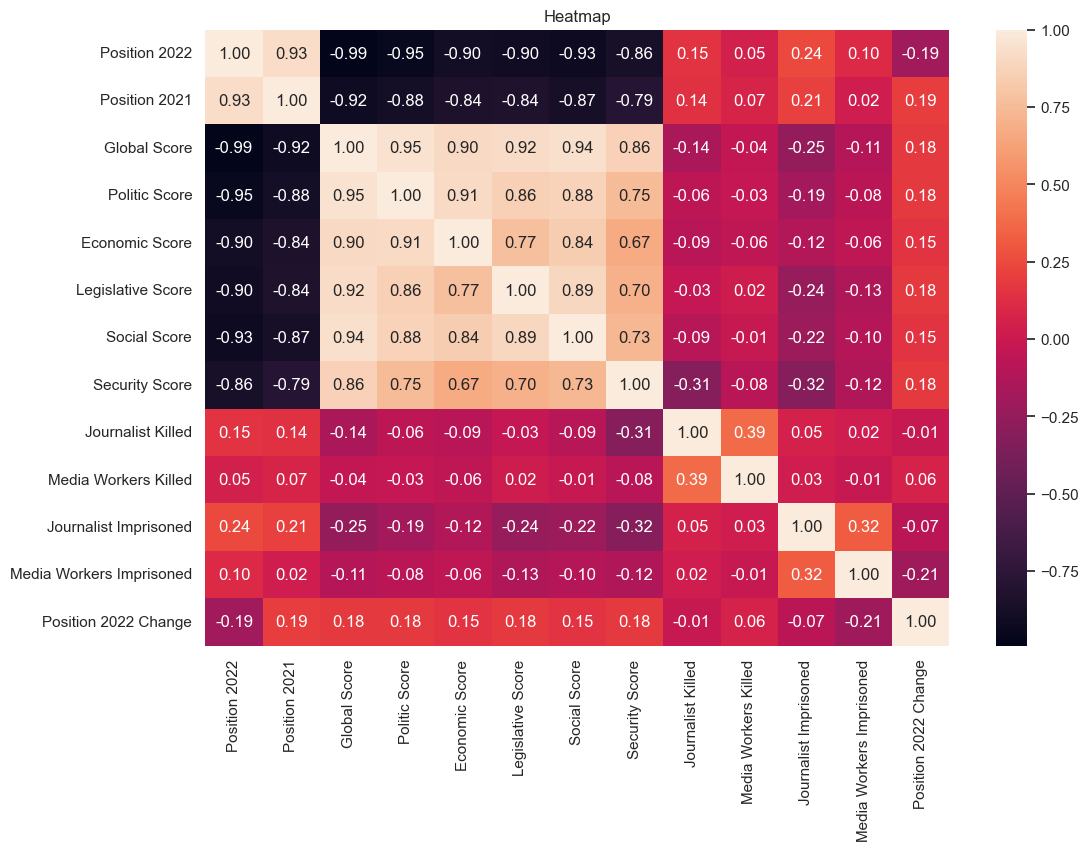

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_2022.corr(), annot=True, fmt=".2f")
plt.title('Heatmap')
plt.show()

It's not surprsing that there appears to be a strong correlation between Global score, and the 5 other Scores, since Global score is calculated from them. The correlation is strongest with Political score, followed closely by Social score. The cololation is weakest with Security score.

Let's take a closer look at the relationship between Global score and the dataset's other numerical columns.

In [28]:
cols = list(df_2022.describe().columns) #Get numerical columns
cols.remove('Global Score')
for col in cols:
    fig = px.scatter(df_2022, x = col, y = 'Global Score', color='Situation', facet_col='Continent', trendline="ols", trendline_scope="overall", hover_name = df_2022.Country, height=300, width=1100, title=col)
    fig.show()

The scatter plots for the Security scores show a noticeably weaker correlation with Global score than the 4 other indicators. There are many examples of countries struggling in areas of security, excelling in the other areas, and vice versa. Further research would be required before drawing any firm conclusions, but it's possible this is due greater variability in safety in the short term. While crises such as war or civil unrest may have effects across all of society, the effects to safety are likely to be felt first and hardest.

Let's take 2022's most prominent example of a country struggling with a new crisis: Ukraine

In [32]:
df_2022[df_2022.Country=='Ukraine']


,Country,ISO Code,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation,Position 2022 Change,Region,Continent
169,Ukraine,UKR,106.0,97.0,55.76,61.21,42.86,79.45,76.43,18.84,7.0,1.0,0.0,0.0,Problematic,-9.0,Eastern Europe,Europe


Ukraine scored only 18 points for security and had 7 Journalist killings, doubtlessly due to their defensive war against Russia. However,they attained very positive Social and Legislative legislative scores.

While the current military crisis surely has had an effect across all of Ukrainian society, the effect on the security and safety of its citizens (and journalists) would be felt immediately. While the war will also affect the economy, political situation, legal framework and culture of Ukraine, those effects will take longer to take effect, and may not be as profound. Time will tell how the war will affect the freedom and safety of journalists in Ukraine. It will be interesting to revisit the Country's World Press Freedom Index next year.